## Hello, this is my final project for the first module of the IBM Machine Learning Professional Certificate: Exploratory Data Analysis for Machine Learning
#### The dataset I have selected is the OpenIPF Dataset, a dataset that contains information from all IPF sanctioned Powerlifting Meets.

The contents of this project are as follows:

- Dataset Summary
- Data Exploration Plan
- Exploratory Data Analysis
- Data Cleaning and Feature Engineering
- Key Findings and Insights
- Hypothesis Formulation
- Hypothesis Testing and Significance Analysis
- Conclusion and Next Steps

## **Data Summary**

The dataset being analyzed within this project is the **OpenIPF** Dataset.

The purpose of this dataset is to provide a location for all the IPF (*International Powerlifting Federation*) sanctioned powerlifting meets, allowing for a place to view records, rankings, meet histories, and more. The dataset is publically available and has documentation available.

**Now, let's go over the dataset itself.**

The dataset includes all information partaining to all IPF sanctioned competitions.
This includes competitor information, attempt information, and meet results.

In [2]:
#Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
dataset_path = r"C:\Users\User\OneDrive\Desktop\codes\IBM data exploration\OpenIPF Analysis\data\openipf-2025-05-24\openipf-2025-05-24-d228cac8.csv"
df = pd.read_csv(dataset_path)

#Display basic dataset info
print('dataset shape: ', df.shape)
print(df.info())
df.describe()
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_10976\2144581887.py:9: DtypeWarning: Columns (33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


dataset shape:  (1359610, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359610 entries, 0 to 1359609
Data columns (total 42 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Name              1359610 non-null  object 
 1   Sex               1359610 non-null  object 
 2   Event             1359610 non-null  object 
 3   Equipment         1359610 non-null  object 
 4   Age               1000670 non-null  float64
 5   AgeClass          1046195 non-null  object 
 6   BirthYearClass    1063246 non-null  object 
 7   Division          1358401 non-null  object 
 8   BodyweightKg      1344581 non-null  float64
 9   WeightClassKg     1343539 non-null  object 
 10  Squat1Kg          571548 non-null   float64
 11  Squat2Kg          566224 non-null   float64
 12  Squat3Kg          553436 non-null   float64
 13  Squat4Kg          328 non-null      float64
 14  Best3SquatKg      983370 non-null   float64
 15  Bench1Kg          7

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned
0,Amy Clair,F,SBD,Raw,36.0,35-39,24-39,Open,75.54,76,...,Australia,NaN,APLA,IPF,2024-10-20,Australia,SA,NaN,AUPC Powerlifting Open,Yes
1,Ruby Olthoff,F,SBD,Raw,17.0,16-17,14-18,Sub-Junior,69.44,76,...,Australia,NaN,APLA,IPF,2024-10-20,Australia,SA,NaN,AUPC Powerlifting Open,Yes
2,Wai Hang Wong,M,SBD,Raw,21.0,20-23,19-23,Junior,70.64,74,...,Australia,NaN,APLA,IPF,2024-10-20,Australia,SA,NaN,AUPC Powerlifting Open,Yes
3,Jonathan Chan #2,M,SBD,Raw,23.0,20-23,19-23,Junior,81.34,83,...,Australia,NaN,APLA,IPF,2024-10-20,Australia,SA,NaN,AUPC Powerlifting Open,Yes
4,Sung Hoon Ok,M,SBD,Raw,22.0,20-23,19-23,Junior,92.42,93,...,Australia,NaN,APLA,IPF,2024-10-20,Australia,SA,NaN,AUPC Powerlifting Open,Yes


### Notable Columns:

- **Event**: *REQUIRED* Specifies the event type with values: (SBD, BD, SB, SD, S, B, D)

- **Equipment**: *REQUIRED* Specifies the EQUIPPED status of the lifter with values: (Raw, Wraps, Single-ply, Multi-ply, Unlimited, Straps) 

- **Division**: *OPTIONAL* Specifies the division of the lifter 

- **WeightClassKg**: *OPTIONAL* Specifies the weight class of the lifter

- **Federation**: Specifies the federation that is in charge of the meet

- **Squat1Kg, Bench1Kg, Deadlift1Kg**: *OPTIONAL* These indicate the attempt values of the nth attempt, with negative values indicating a failed attempt. N can be from 1 to 4

- **Squat4Kg, Bench4Kg, Deadlift4Kg**: *OPTIONAL* Fourth attempts are special, in that they do not count toward the TotalKg. They are used for recording single-lift records

- **Best3SquatKg, Best3BenchKg, Best3DeadliftKg**: *OPTIONAL* Specifies the heaviest successfull attempt made by a lifter in a meet within each category, may be negative to indicate the lowest weight attempted and failed

- **TotalKg**: *OPTIONAL* Specifies the total attained by a lifter in a meet, empty if no valid total was made

- **Dots, Wilks, Glossbrenner, Goodlift**: *OPTIONAL* Different metrics for judging a lifters total while considering other factors, empty for dq

- **Tested**: *OPTIONAL* Specifies the status of a lifter in a competition as a tested or untested lifter


## **Data Exploration Plan**



### **Purpose**

My focus for this analysis will be the different scoring formulas that are used within powerlifting. I will be analyzing the four formulas that are referenced in this dataset.
Within powerlifting there can be difficulty judging lifters across boundaries like age, bodyweight, and sex. These formulas are an attempt to gain a better understanding of relative strength and aim to allow for analysis to be done while taking factors other than simply total weight lifted into account.

- Dots
- Wilks
- Glossbrenner
- Goodlift


### **Initialize**

##

### **Overview of Data**

In [3]:
#Display dataframe head
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned
0,Amy Clair,F,SBD,Raw,36.0,35-39,24-39,Open,75.54,76,...,Australia,NaN,APLA,IPF,2024-10-20,Australia,SA,NaN,AUPC Powerlifting Open,Yes
1,Ruby Olthoff,F,SBD,Raw,17.0,16-17,14-18,Sub-Junior,69.44,76,...,Australia,NaN,APLA,IPF,2024-10-20,Australia,SA,NaN,AUPC Powerlifting Open,Yes
2,Wai Hang Wong,M,SBD,Raw,21.0,20-23,19-23,Junior,70.64,74,...,Australia,NaN,APLA,IPF,2024-10-20,Australia,SA,NaN,AUPC Powerlifting Open,Yes
3,Jonathan Chan #2,M,SBD,Raw,23.0,20-23,19-23,Junior,81.34,83,...,Australia,NaN,APLA,IPF,2024-10-20,Australia,SA,NaN,AUPC Powerlifting Open,Yes
4,Sung Hoon Ok,M,SBD,Raw,22.0,20-23,19-23,Junior,92.42,93,...,Australia,NaN,APLA,IPF,2024-10-20,Australia,SA,NaN,AUPC Powerlifting Open,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359610 entries, 0 to 1359609
Data columns (total 42 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Name              1359610 non-null  object 
 1   Sex               1359610 non-null  object 
 2   Event             1359610 non-null  object 
 3   Equipment         1359610 non-null  object 
 4   Age               1000670 non-null  float64
 5   AgeClass          1046195 non-null  object 
 6   BirthYearClass    1063246 non-null  object 
 7   Division          1358401 non-null  object 
 8   BodyweightKg      1344581 non-null  float64
 9   WeightClassKg     1343539 non-null  object 
 10  Squat1Kg          571548 non-null   float64
 11  Squat2Kg          566224 non-null   float64
 12  Squat3Kg          553436 non-null   float64
 13  Squat4Kg          328 non-null      float64
 14  Best3SquatKg      983370 non-null   float64
 15  Bench1Kg          797016 non-null   float64
 16  

We can see a fair amount of null values, specifically in some columns like the 4th attempt columns for each lift, in the attempt columns themselves. Most null values can be explained by certain federations operating under certain policies where they do not submit certain pieces of data, for example certain federations only submit totals not attempts. Due to the low utilization of these 4th attempt columns I will not be including them in the analysis

In [5]:
#get null counts for each column
df.isnull().sum().sort_values(ascending=False)

Squat4Kg            1359282
Deadlift4Kg         1359135
Bench4Kg            1358349
State               1118550
Squat3Kg             806174
Deadlift3Kg          801960
Squat2Kg             793386
Squat1Kg             788062
Deadlift2Kg          783981
Deadlift1Kg          775504
MeetState            617657
Bench3Kg             588354
Country              569943
Bench2Kg             569531
Bench1Kg             562594
Best3SquatKg         376240
Best3DeadliftKg      360210
Age                  358940
AgeClass             313415
BirthYearClass       296364
MeetTown             220811
Tested               143574
Goodlift             119833
Dots                  86152
Wilks                 86152
Glossbrenner          86152
Best3BenchKg          83912
TotalKg               72862
WeightClassKg         16071
BodyweightKg          15029
Division               1209
Event                     0
Name                      0
Sex                       0
Equipment                 0
Place               

In [6]:
df.describe(include='all')


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned
count,1359610,1359610,1359610,1359610,1.000670e+06,1046195,1063246,1358401,1.344581e+06,1343539,...,789667,241060,1359610,1359610,1359610,1359610,741953,1138799,1359610,1359610
unique,400053,3,7,3,NaN,16,7,1132,NaN,238,...,160,128,112,1,7119,111,197,3925,12904,2
top,Sverre Paulsen,M,SBD,Raw,NaN,24-34,24-39,Open,NaN,93,...,USA,ON,USAPL,IPF,2019-12-07,USA,TX,St. Petersburg,World Bench Press Championships,Yes
freq,217,1013831,1013589,689150,NaN,303293,359714,566760,NaN,123033,...,220694,17130,211749,1359610,2344,375588,43283,24750,9357,1359518
mean,NaN,NaN,NaN,NaN,2.939877e+01,NaN,NaN,NaN,8.220207e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.308663e+01,NaN,NaN,NaN,2.136882e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.600000e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.950000e+01,NaN,NaN,NaN,6.650000e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.500000e+01,NaN,NaN,NaN,8.110000e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,3.650000e+01,NaN,NaN,NaN,9.410000e+01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['WeightClassKg'].describe()

count     1343539
unique        238
top            93
freq       123033
Name: WeightClassKg, dtype: object

In [8]:
df['WeightClassKg'].value_counts()

WeightClassKg
93      123033
83      119277
105      96642
74       87527
82.5     63654
         ...  
83.3         1
85.5         1
62.5         1
92.5         1
79           1
Name: count, Length: 238, dtype: int64

### Purpose

For the purpose of my analysis certain columns may be dropped. The main columns to be focused on are the columns corresponding to the different formulas, as well as certain secondary columns that will be kept based on relevance to my analysis.

In [9]:
#Select all the columns that we are interested in
key_columns = ['Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Bench1Kg', 'Deadlift1Kg','Squat2Kg', 'Bench2Kg', 'Deadlift2Kg','Squat3Kg', 'Bench3Kg', 'Deadlift3Kg','Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift']

In [10]:
df[key_columns].head()

,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Bench3Kg,Deadlift3Kg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
0,F,SBD,Raw,36.0,35-39,24-39,Open,75.54,76,132.5,...,95.0,-167.5,150.0,95.0,160.0,405.0,392.97,383.29,337.07,80.08
1,F,SBD,Raw,17.0,16-17,14-18,Sub-Junior,69.44,76,135.0,...,77.5,175.0,140.0,77.5,175.0,392.5,398.71,392.65,346.18,81.03
2,M,SBD,Raw,21.0,20-23,19-23,Junior,70.64,74,185.0,...,-117.5,217.5,205.0,112.5,217.5,535.0,399.35,398.16,385.71,80.47
3,M,SBD,Raw,23.0,20-23,19-23,Junior,81.34,83,195.0,...,145.0,-245.0,220.0,145.0,235.0,600.0,409.74,405.41,390.33,83.91
4,M,SBD,Raw,22.0,20-23,19-23,Junior,92.42,93,237.5,...,-160.0,280.0,257.5,155.0,280.0,692.5,441.94,436.32,417.71,90.87


What I am doing with some of the columns i kept is I will use certain columns to act as a failsafe for empty/malformed/messy data. For example, some feds do not report the WeightClassKg data, however they may report a column like Age, AgeClass, or BirthYearClass. From within these columns we can find the data that can then be used to extrapolate the value of the WeightClassKg for a specific row. **However** this should be used with caution since there is a risk of having a lifter who competes in a weight class that doesn't neccessarily correspond with their age class, such as in the case of a Junior lifter who competes in the Open. As such, I will keep the columns for the sake of their potential usefullness, but will ideally not rely on them.

My plan for analysis will be to search for trends within the different formulas to assess how certain factors may play a part in the value of the formula

## Exploratory Data Analysis

In [11]:
#make a dataframe based off the key columns that we want to keep
df_key = df[key_columns].copy()


In [12]:
df_key.describe(include='all')

,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Bench3Kg,Deadlift3Kg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
count,1359610,1359610,1359610,1.000670e+06,1046195,1063246,1358401,1.344581e+06,1343539,571548.000000,...,771256.000000,557650.000000,983370.000000,1.275698e+06,999400.000000,1.286748e+06,1.273458e+06,1.273458e+06,1.273458e+06,1.239777e+06
unique,3,7,3,NaN,16,7,1132,NaN,238,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,SBD,Raw,NaN,24-34,24-39,Open,NaN,93,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1013831,1013589,689150,NaN,303293,359714,566760,NaN,123033,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.939877e+01,NaN,NaN,NaN,8.220207e+01,NaN,117.057572,...,-10.718951,21.743456,179.635607,1.204278e+02,197.954986,4.048389e+02,2.977075e+02,2.964762e+02,2.793985e+02,6.639637e+01
std,NaN,NaN,NaN,1.308663e+01,NaN,NaN,NaN,2.136882e+01,NaN,129.984084,...,132.873316,208.940231,68.445674,5.132488e+01,60.985645,2.128999e+02,1.343372e+02,1.337358e+02,1.272260e+02,1.533899e+01
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.600000e+01,NaN,-475.000000,...,-575.000000,-587.500000,-440.000000,-3.250000e+02,-370.000000,1.000000e+00,6.800000e-01,6.700000e-01,6.400000e-01,5.000000e-01
25%,NaN,NaN,NaN,1.950000e+01,NaN,NaN,NaN,6.650000e+01,NaN,95.000000,...,-125.000000,-200.000000,130.000000,8.000000e+01,150.000000,2.175000e+02,1.706625e+02,1.703600e+02,1.600700e+02,5.632000e+01
50%,NaN,NaN,NaN,2.500000e+01,NaN,NaN,NaN,8.110000e+01,NaN,145.000000,...,-53.500000,125.000000,177.500000,1.200000e+02,200.000000,4.050000e+02,3.300000e+02,3.284900e+02,3.078900e+02,6.701000e+01
75%,NaN,NaN,NaN,3.650000e+01,NaN,NaN,NaN,9.410000e+01,NaN,195.000000,...,112.500000,205.000000,225.000000,1.525000e+02,242.500000,5.700000e+02,3.961900e+02,3.942100e+02,3.736500e+02,7.702000e+01


In [13]:
#identify the target columns
score_cols = ['Dots', 'Wilks', 'Glossbrenner', 'Goodlift']

For this analysis we will focus on SBD events only

In [14]:
df_key = df_key[df_key['Event'] == 'SBD']



In [15]:
df_key.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1013589 entries, 0 to 1359609
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Sex              1013589 non-null  object 
 1   Event            1013589 non-null  object 
 2   Equipment        1013589 non-null  object 
 3   Age              729905 non-null   float64
 4   AgeClass         766158 non-null   object 
 5   BirthYearClass   775822 non-null   object 
 6   Division         1012612 non-null  object 
 7   BodyweightKg     1002752 non-null  float64
 8   WeightClassKg    1004068 non-null  object 
 9   Squat1Kg         569392 non-null   float64
 10  Bench1Kg         564783 non-null   float64
 11  Deadlift1Kg      561342 non-null   float64
 12  Squat2Kg         564142 non-null   float64
 13  Bench2Kg         560152 non-null   float64
 14  Deadlift2Kg      553173 non-null   float64
 15  Squat3Kg         551514 non-null   float64
 16  Bench3Kg         547502

First we can focus on filling in all totals that are null while having a valid total

In [16]:

df_totals = df[key_columns].copy()
df_totals['TotalKg'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 1359610 entries, 0 to 1359609
Series name: TotalKg
Non-Null Count    Dtype  
--------------    -----  
1286748 non-null  float64
dtypes: float64(1)
memory usage: 10.4 MB


In [17]:
#give first second and third attempts
def findBestAttempt(f, s, t):
    #if all 3 are null then return null
    if (pd.isna(f) and pd.isna(s) and pd.isna(t)):
        return np.nan
    
    if (not pd.isna(t) and t > 0): #if valid third attempt use that attempt
        return t
    if (not pd.isna(s) and s > 0): #so on
        return s
    if (not pd.isna(f) and f > 0):
        return f
    return np.nan




In [18]:
#for every row with a missing best attempt we can fill in the value using the best of their attempts

#squat
df_key['Best3SquatKg'] = df_key.apply(
    lambda row: findBestAttempt(row['Squat1Kg'], row['Squat2Kg'], row['Squat3Kg']) if pd.isna(row['Best3SquatKg']) else row['Best3SquatKg'],
    axis = 1
)

#bench
df_key['Best3BenchKg'] = df_key.apply(
    lambda row: findBestAttempt(row['Bench1Kg'], row['Bench1Kg'], row['Bench1Kg']) if pd.isna(row['Best3BenchKg']) else row['Best3BenchKg'],
    axis = 1
   
)

#deadlift
df_key['Best3DeadliftKg'] = df_key.apply(
    lambda row: findBestAttempt(row['Deadlift1Kg'], row['Deadlift1Kg'], row['Deadlift1Kg']) if pd.isna(row['Best3DeadliftKg']) else row['Best3DeadliftKg'],
    axis = 1
)

In [19]:
print(df_key['Best3SquatKg'].info())

print(df_key['Best3BenchKg'].info())

print(df_key['Best3DeadliftKg'].info())


<class 'pandas.core.series.Series'>
Index: 1013589 entries, 0 to 1359609
Series name: Best3SquatKg
Non-Null Count   Dtype  
--------------   -----  
980052 non-null  float64
dtypes: float64(1)
memory usage: 15.5 MB
None
<class 'pandas.core.series.Series'>
Index: 1013589 entries, 0 to 1359609
Series name: Best3BenchKg
Non-Null Count   Dtype  
--------------   -----  
970981 non-null  float64
dtypes: float64(1)
memory usage: 15.5 MB
None
<class 'pandas.core.series.Series'>
Index: 1013589 entries, 0 to 1359609
Series name: Best3DeadliftKg
Non-Null Count   Dtype  
--------------   -----  
967979 non-null  float64
dtypes: float64(1)
memory usage: 15.5 MB
None


Now we have narrowed the dataframe down to rows that correspond to SBD events and have filled in the Totals where possible

Next we can calculate any missing totals

Then calculate any missing formulas

To calculate missing totals we can find any rows with null totals, and see if they have a valid attempt for at least 1 squat, bench, and deadlift. if they do then we calculate based off those numbers

In [20]:
def calculateTotal(s, b, d):
    if (pd.isna(s) or pd.isna(b) or pd.isna(d) or s == 0 or b == 0 or d == 0):
        return np.nan
    
    return s+b+d

In [21]:
df_key['TotalKg'] = df_key.apply(
    lambda row: calculateTotal(row['Best3SquatKg'], row['Best3BenchKg'], row['Best3DeadliftKg']) if pd.isna(row['TotalKg']) else row['TotalKg'],
    axis = 1
)

In [22]:
df_key['TotalKg'].info()

<class 'pandas.core.series.Series'>
Index: 1013589 entries, 0 to 1359609
Series name: TotalKg
Non-Null Count   Dtype  
--------------   -----  
960518 non-null  float64
dtypes: float64(1)
memory usage: 15.5 MB


We now filled in all empty totals and empty best attempts

now we can fill in empty formulas

### DOTS

In [23]:
def calculateDots(totalKg, bw, sex):
    #take in total and bw to calculate formula
    if pd.isna(totalKg) or pd.isna(bw) or pd.isna(sex):
        return np.nan
    
    if sex == 'M' or 'Mx':
        a, b, c, d, e, f = 47.46178854, 8.472061379, 0.07369410346, -0.001395833811, 7.076659730e-06, -1.208043364e-08
    elif sex == 'F':
        a, b, c, d, e, f = -125.4255398, 13.71219419, -0.03307250631, 8.962546032e-04, -1.346970864e-06, 7.114301072e-10
    else:
        return np.nan

    coeff = a + b*bw + c*bw**2 + d*bw**3 + e*bw**4 + f*bw**5
    return totalKg * (500 / coeff)

In [24]:
#check null DOTS before filling
df_key['Dots'].info()

<class 'pandas.core.series.Series'>
Index: 1013589 entries, 0 to 1359609
Series name: Dots
Non-Null Count   Dtype  
--------------   -----  
948732 non-null  float64
dtypes: float64(1)
memory usage: 15.5 MB


In [25]:
# Fill missing Dots only where it is NaN
df_key['Dots'] = df_key.apply(
    lambda row: calculateDots(row['TotalKg'], row['BodyweightKg'], row['Sex']) if (pd.isna(row['Dots']) and row['BodyweightKg']) else row['Dots'],
    axis=1
)

In [26]:
df_key['Dots'].info()

<class 'pandas.core.series.Series'>
Index: 1013589 entries, 0 to 1359609
Series name: Dots
Non-Null Count   Dtype  
--------------   -----  
951080 non-null  float64
dtypes: float64(1)
memory usage: 15.5 MB


### WILKS

In [27]:
def calculateWilks(total_kg, bodyweight_kg, sex):
    if pd.isna(total_kg) or pd.isna(bodyweight_kg):
        return np.nan
    bw = bodyweight_kg

    if sex == 'M' or 'Mx':
        a, b, c, d, e, f = -216.0475144, 16.2606339, -0.002388645, -0.00113732, 7.01863e-06, -1.291e-08
    elif sex == 'F':
        a, b, c, d, e, f = 594.31747775582, -27.23842536447, 0.82112226871, -0.00930733913, 4.731582e-05, -9.054e-08
    else:
        return np.nan

    coeff = a + b*bw + c*bw**2 + d*bw**3 + e*bw**4 + f*bw**5
    return total_kg * (500 / coeff)


In [28]:
#check null Wilks before filling
df_key['Wilks'].info()

<class 'pandas.core.series.Series'>
Index: 1013589 entries, 0 to 1359609
Series name: Wilks
Non-Null Count   Dtype  
--------------   -----  
948732 non-null  float64
dtypes: float64(1)
memory usage: 15.5 MB


In [29]:
# Fill missing Wilks only where it is NaN
df_key['Wilks'] = df_key.apply(
    lambda row: calculateWilks(row['TotalKg'], row['BodyweightKg'], row['Sex']) if pd.isna(row['Wilks']) else row['Wilks'],
    axis=1
)

In [30]:
df_key['Wilks'].info()

<class 'pandas.core.series.Series'>
Index: 1013589 entries, 0 to 1359609
Series name: Wilks
Non-Null Count   Dtype  
--------------   -----  
951080 non-null  float64
dtypes: float64(1)
memory usage: 15.5 MB


### GLOSSBRENNER

In [31]:
def calculateGlossbrenner(total_kg, bodyweight_kg):
    if pd.isna(total_kg) or pd.isna(bodyweight_kg) or bodyweight_kg == 0:
        return np.nan
    return (total_kg / bodyweight_kg) * 100


In [32]:
#check null Glossbrenner before filling
df_key['Glossbrenner'].info()

<class 'pandas.core.series.Series'>
Index: 1013589 entries, 0 to 1359609
Series name: Glossbrenner
Non-Null Count   Dtype  
--------------   -----  
948732 non-null  float64
dtypes: float64(1)
memory usage: 15.5 MB


In [33]:
# Fill missing Glossbrenner only where it is NaN
df_key['Glossbrenner'] = df_key.apply(
    lambda row: calculateGlossbrenner(row['TotalKg'], row['BodyweightKg']) if pd.isna(row['Glossbrenner']) else row['Glossbrenner'],
    axis=1
)

In [34]:
df_key['Glossbrenner'].info()

<class 'pandas.core.series.Series'>
Index: 1013589 entries, 0 to 1359609
Series name: Glossbrenner
Non-Null Count   Dtype  
--------------   -----  
951080 non-null  float64
dtypes: float64(1)
memory usage: 15.5 MB


### GOODLIFTS

In [35]:
import math

def calculateGoodlift(total_kg, bodyweight_kg, sex):
    if pd.isna(total_kg) or pd.isna(bodyweight_kg) or bodyweight_kg <= 0:
        return np.nan

    if sex == 'M':
        a, b, c = 0.794358141, 0.080196182, 2.715390227
    elif sex == 'F':
        a, b, c = 0.897260740, 0.105145986, 2.441103
    else:
        return np.nan

    denominator = (a * math.log10(bodyweight_kg) - b) ** c
    return total_kg / denominator


In [36]:
#check null Goodlift before filling
df_key['Goodlift'].info()

<class 'pandas.core.series.Series'>
Index: 1013589 entries, 0 to 1359609
Series name: Goodlift
Non-Null Count   Dtype  
--------------   -----  
948118 non-null  float64
dtypes: float64(1)
memory usage: 15.5 MB


In [37]:
# Fill missing Goodlift only where it is NaN
df_key['Goodlift'] = df_key.apply(
    lambda row: calculateGoodlift(row['TotalKg'], row['BodyweightKg'], row['Sex']) if pd.isna(row['Goodlift']) else row['Goodlift'],
    axis=1
)

In [38]:
df_key['Goodlift'].info()

<class 'pandas.core.series.Series'>
Index: 1013589 entries, 0 to 1359609
Series name: Goodlift
Non-Null Count   Dtype  
--------------   -----  
951080 non-null  float64
dtypes: float64(1)
memory usage: 15.5 MB


#### So at this point, we have filled in as much of the formula columns as possible and we can now begin doing analysis

In [39]:
#we start by dropping all rows that are missing one of the formulas

df_key = df_key.dropna(subset=score_cols)


### Current dataframe stats

In [40]:
print("Shape of the working dataframe: ", df_key.shape)
print("Number of missing values of the working dataframe: \n", df_key.isnull().sum())
print("Data types of the working dataframe: \n", df_key.dtypes)


Shape of the working dataframe:  (951080, 26)
Number of missing values of the working dataframe: 
 Sex                     0
Event                   0
Equipment               0
Age                262521
AgeClass           228600
BirthYearClass     218844
Division              894
BodyweightKg            0
WeightClassKg        5915
Squat1Kg           407095
Bench1Kg           407178
Deadlift1Kg        406898
Squat2Kg           411644
Bench2Kg           410620
Deadlift2Kg        413145
Squat3Kg           423139
Bench3Kg           422376
Deadlift3Kg        429195
Best3SquatKg         5517
Best3BenchKg         5487
Best3DeadliftKg      5441
TotalKg                 0
Dots                    0
Wilks                   0
Glossbrenner            0
Goodlift                0
dtype: int64
Data types of the working dataframe: 
 Sex                 object
Event               object
Equipment           object
Age                float64
AgeClass            object
BirthYearClass      object
Division   

We have simplified the data to 951,080 rows, all of which have a non-null value for each formula column

We can now begin analysis

Columns that are of interest to compare between the different formulas:

- Sex (M, F, Mx)
- Event (Raw, Single-ply, Multi-ply)
- BodyWeightKg


Theres something I want to take a look for, I want to see if there is a significant difference in each formulas ability to accurately judge what qualifies an outlier within a weightclass.
To better understand the way these formulas are constructed, the IPF GL points formula was calculated using the single best result at a point in time of all lifters whos result was not less than 16% of the at-the-time world record in their class. Here is a link to where the IPF shows information on how they generated their coefficients: https://www.powerlifting.sport/fileadmin/ipf/data/ipf-formula/IPF_GL_Coefficients-2020.pdf

In [41]:
df_key.drop('Event', axis = 1) #all events are sbd so we drop this
df_key.head()

,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Bench3Kg,Deadlift3Kg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
0,F,SBD,Raw,36.0,35-39,24-39,Open,75.54,76,132.5,...,95.0,-167.5,150.0,95.0,160.0,405.0,392.97,383.29,337.07,80.08
1,F,SBD,Raw,17.0,16-17,14-18,Sub-Junior,69.44,76,135.0,...,77.5,175.0,140.0,77.5,175.0,392.5,398.71,392.65,346.18,81.03
2,M,SBD,Raw,21.0,20-23,19-23,Junior,70.64,74,185.0,...,-117.5,217.5,205.0,112.5,217.5,535.0,399.35,398.16,385.71,80.47
3,M,SBD,Raw,23.0,20-23,19-23,Junior,81.34,83,195.0,...,145.0,-245.0,220.0,145.0,235.0,600.0,409.74,405.41,390.33,83.91
4,M,SBD,Raw,22.0,20-23,19-23,Junior,92.42,93,237.5,...,-160.0,280.0,257.5,155.0,280.0,692.5,441.94,436.32,417.71,90.87


### Column descriptions

In [42]:
#describe for numerical cols
df_key.describe()

,Age,BodyweightKg,Squat1Kg,Bench1Kg,Deadlift1Kg,Squat2Kg,Bench2Kg,Deadlift2Kg,Squat3Kg,Bench3Kg,Deadlift3Kg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
count,688559.000000,951080.000000,543985.000000,543902.000000,544182.000000,539436.000000,540460.000000,537935.000000,527941.000000,528704.000000,521885.000000,945563.000000,945593.000000,945639.000000,951080.000000,951080.000000,951080.000000,951080.000000,951080.000000
mean,27.766586,81.437653,124.119074,85.910028,164.990616,109.092998,64.407493,138.553769,48.947895,-1.966558,24.493214,179.543535,115.751934,197.926287,493.033232,364.169369,362.664758,342.135942,68.340979
std,11.951493,20.890227,121.572287,74.893700,94.207892,147.645050,101.818992,147.471543,183.287342,124.244518,208.677150,66.174738,47.787963,60.822883,167.907413,80.082943,79.683582,79.149097,15.579426
min,0.000000,17.400000,-470.000000,-425.500000,-380.000000,-485.000000,-575.000000,-502.500000,-525.000000,-575.000000,-587.500000,-440.000000,-320.000000,-370.000000,-940.000000,-562.485363,-564.105179,-953.360768,-300.888167
25%,19.500000,66.000000,97.500000,60.000000,130.000000,92.500000,47.500000,122.500000,-140.000000,-112.500000,-200.000000,130.000000,77.500000,150.000000,357.500000,311.940000,310.570000,289.900000,58.740000
50%,23.500000,80.600000,147.500000,95.000000,180.000000,150.000000,90.000000,177.500000,122.500000,-45.000000,125.000000,177.500000,115.000000,200.000000,495.000000,363.550000,361.845000,341.610000,68.640000
75%,32.500000,92.600000,195.000000,130.000000,220.000000,200.000000,132.500000,227.500000,192.500000,115.000000,205.000000,225.000000,147.500000,242.500000,610.000000,415.920000,413.860000,393.120000,78.090000
max,95.500000,275.000000,475.000000,426.000000,410.000000,515.000000,415.000000,411.000000,500.000000,435.000000,420.000000,515.000000,435.000000,430.000000,1296.000000,709.210000,708.690000,1310.717039,346.284523


In [43]:
#describe for categorical cols
df_key.select_dtypes(include='object').describe()


,Sex,Event,Equipment,AgeClass,BirthYearClass,Division,WeightClassKg
count,951080,951080,951080,722480,732236,950186,945165
unique,3,1,3,16,7,901,191
top,M,SBD,Raw,24-34,24-39,Open,93
freq,693410,951080,504577,213188,248105,384898,87973


### Numerical Distributions

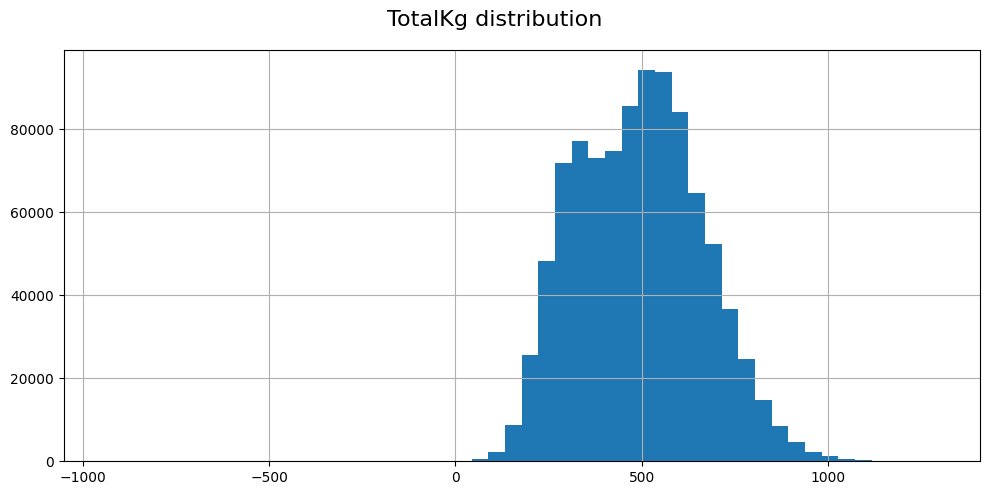

In [44]:
df_key['TotalKg'].hist(bins=50, figsize=(10, 5))
plt.suptitle("TotalKg distribution", fontsize=16)
plt.tight_layout()
plt.show()


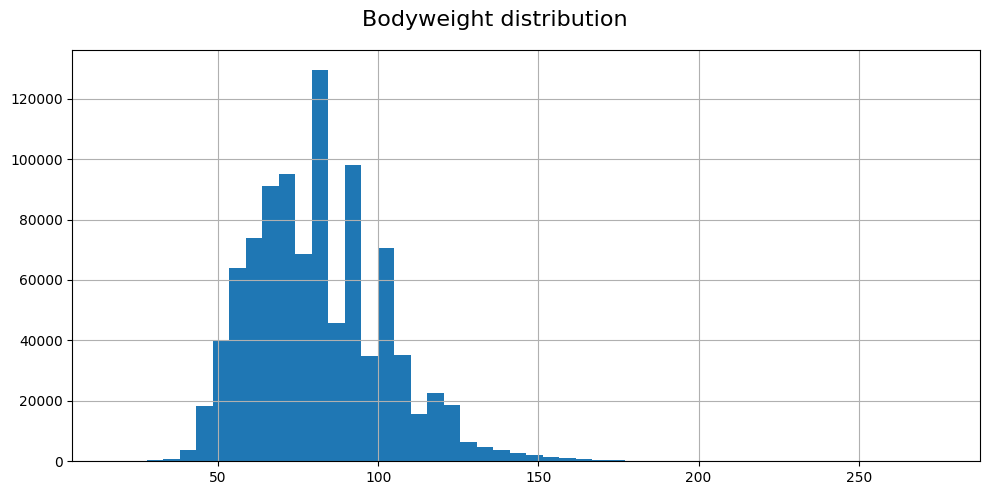

In [45]:
df_key['BodyweightKg'].hist(bins=50, figsize=(10, 5))
plt.suptitle("Bodyweight distribution", fontsize=16)
plt.tight_layout()
plt.show()

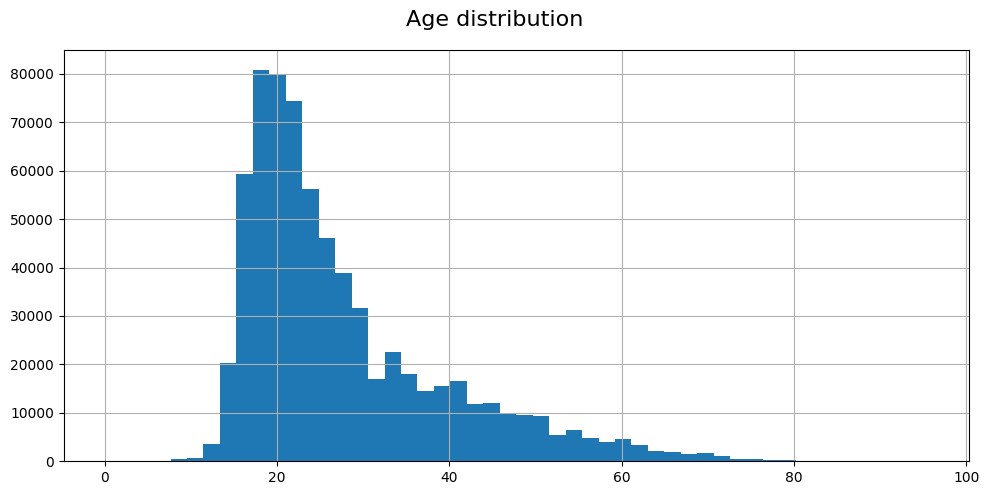

In [46]:
df_key['Age'].hist(bins=50, figsize=(10, 5))
plt.suptitle("Age distribution", fontsize=16)
plt.tight_layout()
plt.show()

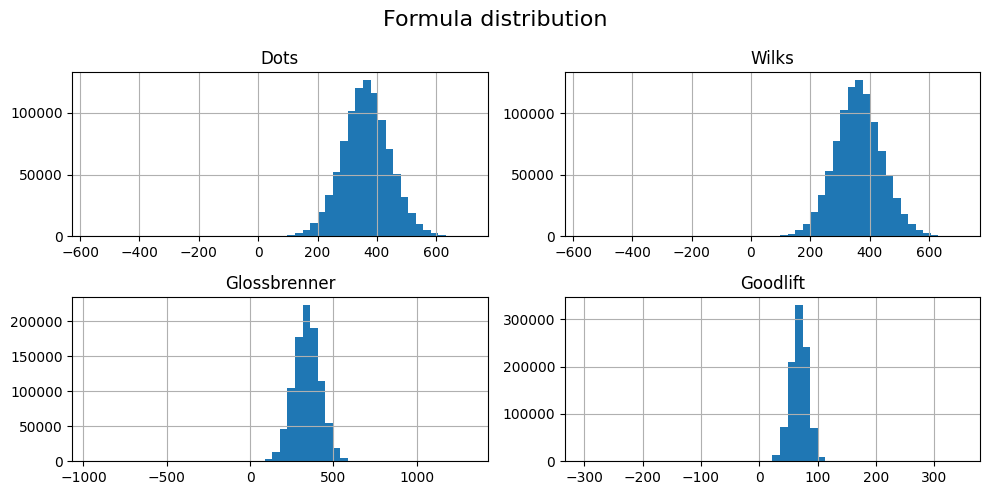

In [47]:
df_key[score_cols].hist(bins=50, figsize=(10, 5))
plt.suptitle('Formula distribution', fontsize=16)
plt.tight_layout()
plt.show()

### Categorical Distributions

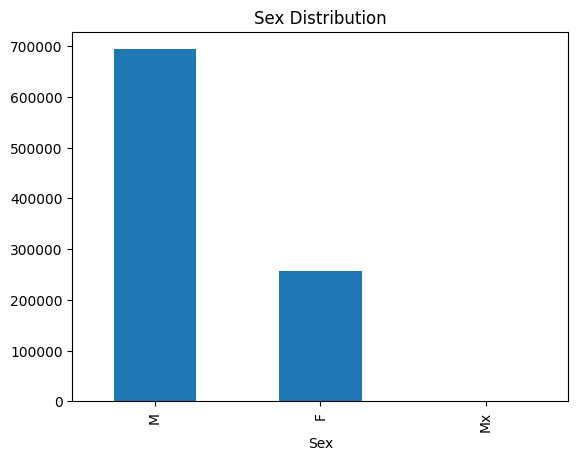

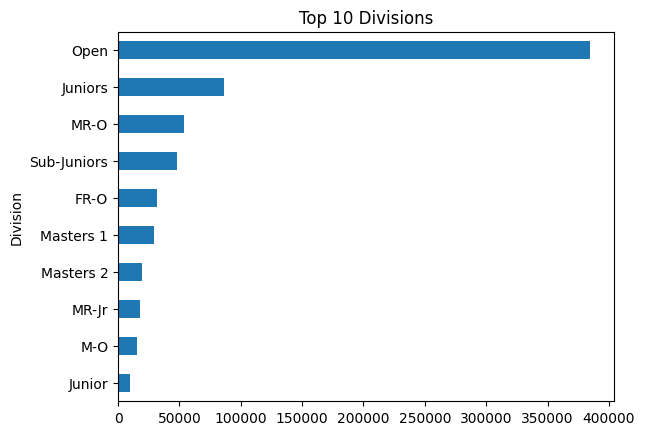

In [58]:
df_key['Sex'].value_counts().plot(kind='bar', title="Sex Distribution")
plt.show()

df_key['Division'].value_counts().head(10).plot(kind='barh', title="Top 10 Divisions")
plt.gca().invert_yaxis()
plt.show()


We have an issue with the division column where the values are not clean, and are input with different alterations, artifically increasing the number of column values. To deal with this, I can ignore the divisions column and use the age column instead.

In [62]:
# i have an idea to deal with the issue with the division column
# i can start by dropping all rows with a value that is not one of the top 10 most common values within the column but first i have to check to measure the significance of those rows

top10 = df_key['Division'].value_counts().nlargest(10)
top10 = top10.sum()
total = len(df_key)
coverage = top10 / total

print(f"Top 10 coverage: {coverage:.2%}")


Top 10 coverage: 73.32%


In [68]:
# the top 10 columns cover 70%, ideal we want that to be a bit higher so we can try the top 15/20

top20 = df_key['Division'].value_counts().nlargest(20)
top20 = top20.sum()
total = len(df_key)
coverage = top20 / total

print(f"Top 20 coverage: {coverage:.2%}")


Top 20 coverage: 80.37%


In [76]:
# even with the top 20 we dont gain that much coverage
# to check how much i might need ill try diff values to see how high i can get

value = 60
top = df_key['Division'].value_counts().nlargest(value)
top = top.sum()
total = len(df_key)
coverage = top / total

print(f"Top {value} coverage: {coverage:.2%}")

Top 60 coverage: 90.08%


In [ ]:
# we need 60 to reach 90% coverage which is quite high
# what i can do next is test for the relationship of these rows to the formulas to test how signifant they may be

top_20_labels = df_key['Division'].value_counts().nlargest(20).index
df_key['Division_with_other'] = df_key['Division'].apply(lambda x: x if x in top_20_labels else 'Other')


In [ ]:
#to start, we will take the top 10 divisons

top10divisions = ['Open', 'Juniors', 'MR-O', 'Sub-Juniors', 'FR-O', 'Masters 1', 'Masters 2', 'MR-Jr', 'M-O', 'Junior']

# we can use these to clean the columns

df_key = df_key[top10divisions.includes(df_key['Division'])]

#then we can make a mapping to deal with 

In [55]:
df_key['AgeClass'].info()

<class 'pandas.core.series.Series'>
Index: 951080 entries, 0 to 1359609
Series name: AgeClass
Non-Null Count   Dtype 
--------------   ----- 
722480 non-null  object
dtypes: object(1)
memory usage: 14.5+ MB
